In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection-in-electricity-and-gas-consumption/fraud_data_updated.csv


In [2]:
full_data=pd.read_csv('/kaggle/input/fraud-detection-in-electricity-and-gas-consumption/fraud_data_updated.csv')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
import lightgbm as lgb

In [5]:
full_data=full_data.drop(['Unnamed:_0'],axis=1)
#te=te.drop(['client_id','creation_date'],axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(full_data)

        Unnamed: 0  tarif_type  disrict  client_catg  region  \
0                0          11       60           11     101   
1                1          11       69           11     107   
2                2          11       62           11     301   
3                3          11       69           11     105   
4                4          11       62           11     303   
...            ...         ...      ...          ...     ...   
204897      204897          40       63           11     311   
204898      204898          11       63           11     311   
204899      204899          40       63           11     311   
204900      204900          10       60           11     101   
204901      204901          11       60           11     101   

        avg_consom_l_1_ELEC  avg_consom_l_1_GAZ  var_consom_l_1_ELEC  \
0                352.400000            0.000000         96313.070588   
1                557.540541            0.000000         39178.644144   
2              

In [6]:
y_train=full_data['target']
X_train=full_data.drop(['target'],axis=1)
y_train=y_train.astype(int)
x_train,x_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=4,stratify=y_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
#te=scaler.fit_transform(te)
print(x_train)

[[0.26044285 0.86486486 0.         ... 0.         0.         0.81818182]
 [0.28116993 0.86486486 0.         ... 0.         0.         1.        ]
 [0.31062318 0.08108108 0.33333333 ... 0.         0.         0.72727273]
 ...
 [0.71392526 0.08108108 0.         ... 0.         0.         0.18181818]
 [0.11899893 0.05405405 0.         ... 0.         0.         0.45454545]
 [0.57132957 0.08108108 0.         ... 0.         0.         0.81818182]]


LGBMClassifier(learning_rate=0.0695305887282317, max_depth=14,
               min_child_samples=11, n_estimators=1954, num_leaves=16383,
               objective='binary', silent=True)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Results on test data
Test accuracy =  0.9397
Test precision =  0.9516
Test recall =  0.0457
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38399
           1       0.95      0.05      0.09      2582

    accuracy                           0.94     40981
   macro avg       0.95      0.52      0.53     40981
weighted avg       0.94      0.94      0.91     40981

Confusion matrix (Rows actual, Columns predicted):
       0    1
0  38393    6
1   2464  118

ROC curve


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


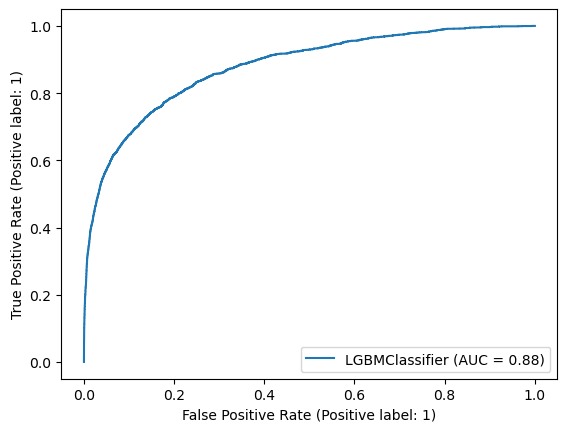

In [7]:
lgbm_mod = lgb.LGBMClassifier(boosting_type='gbdt', 
                              num_leaves=2**14-1, 
                              max_depth=14, 
                              learning_rate=0.0695305887282317, 
                              n_estimators=1954, 
                              subsample_for_bin=200000, 
                              objective='binary', 
                              class_weight=None, 
                              min_split_gain=0.0, 
                              min_child_weight=1e-3, 
                              min_child_samples=11, 
                              subsample=1.0, 
                              subsample_freq=0, 
                              colsample_bytree=1.0, 
                              reg_alpha=0.0, 
                              reg_lambda=0.0, 
                              random_state=None, 
                              n_jobs=-1, 
                              silent=True, 
                              importance_type='split')

print(lgbm_mod) # display model parameters
lgbm_mod.fit(x_train, y_train) # train model
pred_lgm = lgbm_mod.predict(x_test) # predicted output for test examples
print("Results on test data")
acc_lgm = accuracy_score(y_test, pred_lgm) # accuracy on test examples
prec_lgm= precision_score(y_test, pred_lgm) # precision on test examples
reca_lgm = recall_score(y_test, pred_lgm) # recall on test examples
print(f'Test accuracy = {acc_lgm: .4f}') # round to 4 decimal places
print(f'Test precision = {prec_lgm: .4f}') # round to 4 decimal places
print(f'Test recall = {reca_lgm: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_lgm))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred_lgm)))
print('\nROC curve')
plot_roc_curve(lgbm_mod, x_test, y_test)
plt.show() 

# DATA BALANCING

In [10]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [11]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
#sm = SMOTE(random_state=2)
x_train_over, y_train_over = over.fit_resample(x_train, y_train.ravel())
x_train_under, y_train_under =under.fit_resample(x_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(x_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_over.shape))
print('After UnderSampling, the shape of train_X: {}'.format(x_train_under.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_under.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over==0)))
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_under==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_under==0)))

Before OverSampling, counts of label '1': 10329
Before OverSampling, counts of label '0': 153592 

After OverSampling, the shape of train_X: (230388, 136)
After OverSampling, the shape of train_y: (230388,) 

After UnderSampling, the shape of train_X: (113619, 136)
After UnderSampling, the shape of train_y: (113619,) 

After OverSampling, counts of label '1': 76796
After OverSampling, counts of label '0': 153592
After UnderSampling, counts of label '1': 10329
After UnderSampling, counts of label '0': 103290


# OVER SAMPLING

LGBMClassifier(learning_rate=0.0695305887282317, max_depth=14,
               min_child_samples=11, n_estimators=1954, num_leaves=16383,
               objective='binary', silent=True)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Results on test data
Test accuracy =  0.8511
Test precision =  0.2340
Test recall =  0.5995
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     38399
           1       0.23      0.60      0.34      2582

    accuracy                           0.85     40981
   macro avg       0.60      0.73      0.63     40981
weighted avg       0.92      0.85      0.88     40981

Confusion matrix (Rows actual, Columns predicted):
       0     1
0  33332  5067
1   1034  1548

ROC curve


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


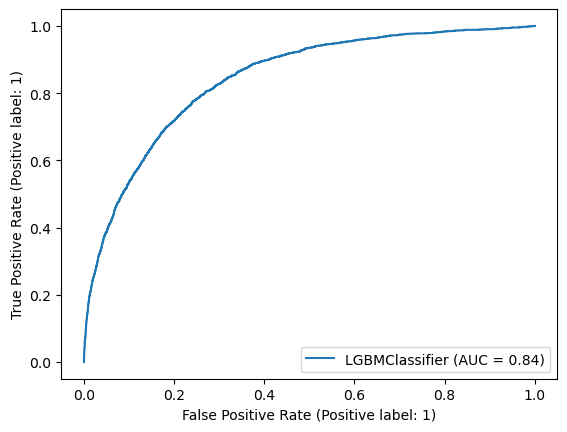

In [14]:
lgbm_mod_over = lgb.LGBMClassifier(boosting_type='gbdt', 
                              num_leaves=2**14-1, 
                              max_depth=14, 
                              learning_rate=0.0695305887282317, 
                              n_estimators=1954, 
                              subsample_for_bin=200000, 
                              objective='binary', 
                              class_weight=None, 
                              min_split_gain=0.0, 
                              min_child_weight=1e-3, 
                              min_child_samples=11, 
                              subsample=1.0, 
                              subsample_freq=0, 
                              colsample_bytree=1.0, 
                              reg_alpha=0.0, 
                              reg_lambda=0.0, 
                              random_state=None, 
                              n_jobs=-1, 
                              silent=True, 
                              importance_type='split')

print(lgbm_mod_over) # display model parameters
lgbm_mod_over.fit(x_train_over, y_train_over.ravel()) # train model
pred_lgm = lgbm_mod_over.predict_proba(x_test)[:, 1]
threshold = 0.5
pred_lgm = (pred_lgm >= threshold).astype(int) # predicted output for test examples
print("Results on test data")
acc_lgm = accuracy_score(y_test, pred_lgm) # accuracy on test examples
prec_lgm= precision_score(y_test, pred_lgm) # precision on test examples
reca_lgm = recall_score(y_test, pred_lgm) # recall on test examples
print(f'Test accuracy = {acc_lgm: .4f}') # round to 4 decimal places
print(f'Test precision = {prec_lgm: .4f}') # round to 4 decimal places
print(f'Test recall = {reca_lgm: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_lgm))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred_lgm)))
print('\nROC curve')
plot_roc_curve(lgbm_mod_over, x_test, y_test)
plt.show() 

# UNDER SAMPLING

LGBMClassifier(learning_rate=0.0695305887282317, max_depth=14,
               min_child_samples=11, n_estimators=1954, num_leaves=16383,
               objective='binary', silent=True)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Results on test data
Test accuracy =  0.9404
Test precision =  0.9217
Test recall =  0.0593
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38399
           1       0.92      0.06      0.11      2582

    accuracy                           0.94     40981
   macro avg       0.93      0.53      0.54     40981
weighted avg       0.94      0.94      0.92     40981

Confusion matrix (Rows actual, Columns predicted):
       0    1
0  38386   13
1   2429  153

ROC curve


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


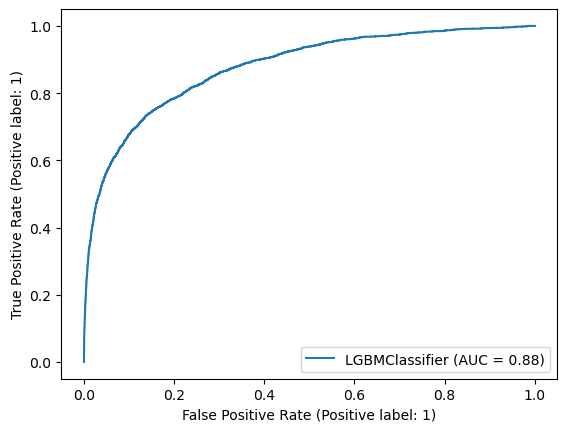

In [17]:
lgbm_mod_under = lgb.LGBMClassifier(boosting_type='gbdt', 
                              num_leaves=2**14-1, 
                              max_depth=14, 
                              learning_rate=0.0695305887282317, 
                              n_estimators=1954, 
                              subsample_for_bin=200000, 
                              objective='binary', 
                              class_weight=None, 
                              min_split_gain=0.0, 
                              min_child_weight=1e-3, 
                              min_child_samples=11, 
                              subsample=1.0, 
                              subsample_freq=0, 
                              colsample_bytree=1.0, 
                              reg_alpha=0.0, 
                              reg_lambda=0.0, 
                              random_state=None, 
                              n_jobs=-1, 
                              silent=True, 
                              importance_type='split')

print(lgbm_mod_under) # display model parameters
lgbm_mod_under.fit(x_train_under, y_train_under.ravel()) # train model
pred_lgm = lgbm_mod_under.predict_proba(x_test)[:, 1]
threshold = 0.5
pred_lgm = (pred_lgm >= threshold).astype(int) # predicted output for test examples
print("Results on test data") # predicted output for test examples
acc_lgm = accuracy_score(y_test, pred_lgm) # accuracy on test examples
prec_lgm= precision_score(y_test, pred_lgm) # precision on test examples
reca_lgm = recall_score(y_test, pred_lgm) # recall on test examples
print(f'Test accuracy = {acc_lgm: .4f}') # round to 4 decimal places
print(f'Test precision = {prec_lgm: .4f}') # round to 4 decimal places
print(f'Test recall = {reca_lgm: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_lgm))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred_lgm)))
print('\nROC curve')
plot_roc_curve(lgbm_mod_under, x_test, y_test)
plt.show() 

In [19]:
pred_lgm.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

# CATBOOST

In [21]:
from catboost import CatBoostClassifier

# OVER SAMPLING

0:	learn: 0.6680261	total: 311ms	remaining: 5m 10s
1:	learn: 0.6998219	total: 548ms	remaining: 4m 33s
2:	learn: 0.7202391	total: 762ms	remaining: 4m 13s
3:	learn: 0.7343892	total: 994ms	remaining: 4m 7s
4:	learn: 0.7436058	total: 1.24s	remaining: 4m 5s
5:	learn: 0.7463221	total: 1.48s	remaining: 4m 4s
6:	learn: 0.7653425	total: 1.7s	remaining: 4m
7:	learn: 0.7689091	total: 1.93s	remaining: 3m 59s
8:	learn: 0.7694854	total: 2.15s	remaining: 3m 57s
9:	learn: 0.7715523	total: 2.38s	remaining: 3m 55s
10:	learn: 0.7814230	total: 2.59s	remaining: 3m 53s
11:	learn: 0.7833320	total: 2.81s	remaining: 3m 51s
12:	learn: 0.7873688	total: 3.06s	remaining: 3m 52s
13:	learn: 0.7929931	total: 3.3s	remaining: 3m 52s
14:	learn: 0.7952317	total: 3.57s	remaining: 3m 54s
15:	learn: 0.7962836	total: 3.81s	remaining: 3m 54s
16:	learn: 0.7990852	total: 4.02s	remaining: 3m 52s
17:	learn: 0.8003349	total: 4.25s	remaining: 3m 51s
18:	learn: 0.8023376	total: 4.49s	remaining: 3m 51s
19:	learn: 0.8069940	total: 4.7

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


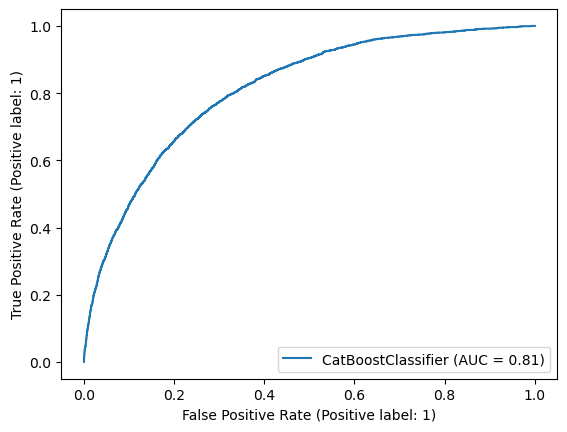

In [22]:
good_model_cat = CatBoostClassifier(iterations=1000, depth=8, learning_rate=0.1,
                           loss_function="CrossEntropy", eval_metric="F1",
                           random_seed=42, od_type="Iter", od_wait=50,
                           l2_leaf_reg=5, rsm=0.8)
print(good_model_cat) # display model parameters
good_model_cat.fit(x_train_over, y_train_over.ravel()) # train model
pred_cat = good_model_cat.predict_proba(x_test)[:, 1]
threshold = 0.5
pred_cat = (pred_cat >= threshold).astype(int) # predicted output for test examples
print("Results on test data")
acc_cat = accuracy_score(y_test, pred_cat) # accuracy on test examples
prec_cat= precision_score(y_test, pred_cat) # precision on test examples
reca_cat = recall_score(y_test, pred_cat) # recall on test examples
print(f'Test accuracy = {acc_cat: .4f}') # round to 4 decimal places
print(f'Test precision = {prec_cat: .4f}') # round to 4 decimal places
print(f'Test recall = {reca_cat: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_cat))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred_cat)))
print('\nROC curve')
plot_roc_curve(good_model_cat, x_test, y_test)
plt.show() 

# UNDER SAMPLING

0:	learn: 0.0011611	total: 142ms	remaining: 2m 22s
1:	learn: 0.0007742	total: 285ms	remaining: 2m 22s
2:	learn: 0.0000000	total: 436ms	remaining: 2m 24s
3:	learn: 0.0000000	total: 594ms	remaining: 2m 27s
4:	learn: 0.0003872	total: 743ms	remaining: 2m 27s
5:	learn: 0.0000000	total: 883ms	remaining: 2m 26s
6:	learn: 0.0000000	total: 1.02s	remaining: 2m 24s
7:	learn: 0.0001936	total: 1.17s	remaining: 2m 25s
8:	learn: 0.0000000	total: 1.3s	remaining: 2m 23s
9:	learn: 0.0000000	total: 1.44s	remaining: 2m 22s
10:	learn: 0.0003872	total: 1.59s	remaining: 2m 22s
11:	learn: 0.0003871	total: 1.73s	remaining: 2m 22s
12:	learn: 0.0019335	total: 1.88s	remaining: 2m 22s
13:	learn: 0.0059811	total: 2.03s	remaining: 2m 23s
14:	learn: 0.0102070	total: 2.18s	remaining: 2m 23s
15:	learn: 0.0151704	total: 2.32s	remaining: 2m 22s
16:	learn: 0.0140263	total: 2.46s	remaining: 2m 22s
17:	learn: 0.0159309	total: 2.6s	remaining: 2m 21s
18:	learn: 0.0204824	total: 2.75s	remaining: 2m 21s
19:	learn: 0.0251884	tot

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


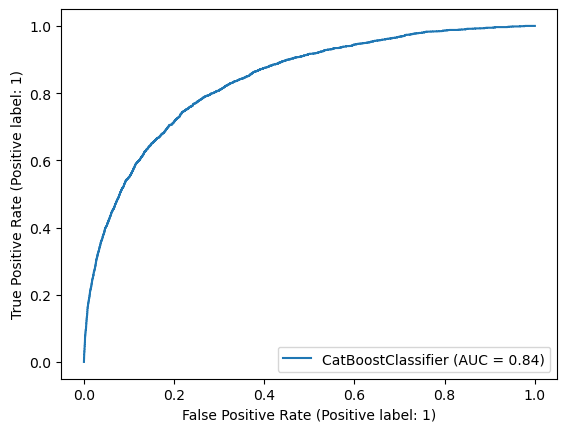

In [23]:
good_model_cat = CatBoostClassifier(iterations=1000, depth=8, learning_rate=0.1,
                           loss_function="CrossEntropy", eval_metric="F1",
                           random_seed=42, od_type="Iter", od_wait=50,
                           l2_leaf_reg=5, rsm=0.8)
print(good_model_cat) # display model parameters
good_model_cat.fit(x_train_under, y_train_under.ravel()) # train model
pred_cat = good_model_cat.predict_proba(x_test)[:, 1]
threshold = 0.5
pred_cat = (pred_cat >= threshold).astype(int) # predicted output for test examples
print("Results on test data")
acc_cat = accuracy_score(y_test, pred_cat) # accuracy on test examples
prec_cat= precision_score(y_test, pred_cat) # precision on test examples
reca_cat = recall_score(y_test, pred_cat) # recall on test examples
print(f'Test accuracy = {acc_cat: .4f}') # round to 4 decimal places
print(f'Test precision = {prec_cat: .4f}') # round to 4 decimal places
print(f'Test recall = {reca_cat: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_cat))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred_cat)))
print('\nROC curve')
plot_roc_curve(good_model_cat, x_test, y_test)
plt.show() 

# XGB

# OVER SAMPLING

XGBClassifier(alpha=0.2, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=0.8, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False, eta=0.1,
              eval_metric=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
Results on test data
Test accuracy =  0.8473
Test precision =  0.1832
Test recall =  0.4113
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.91     38399
           1       0.18      0.41      0.25      2582

    accurac

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


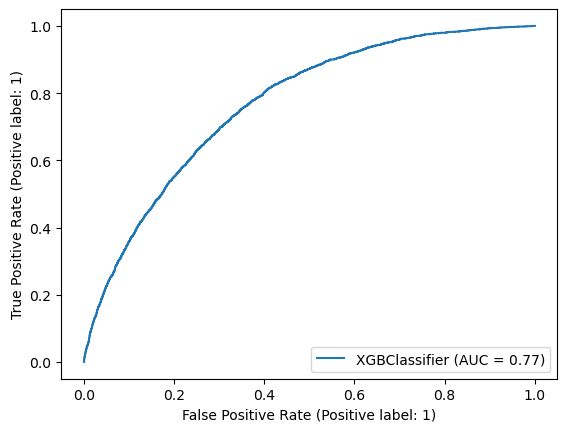

In [48]:
good_modelxgb= XGBClassifier(booster='gbtree', objective='binary:logistic', eta=0.1, max_depth=5, subsample=0.7,colsample_bytree=0.5, colsample_bylevel=0.9, colsample_bynode=0.8,
                             alpha=0.2, reg_lambda= 0.4, n_estimators=200, random_state=42, verbosity=1) # create model 
print(good_modelxgb) # display model parameters
good_modelxgb.fit(x_train_over,y_train_over.ravel()) # train model
predxgb = good_modelxgb.predict(x_test) # predicted output for test examples
print("Results on test data")
accsvm = accuracy_score(y_test, predxgb) # accuracy on test examples
precsvm = precision_score(y_test, predxgb) # precision on test examples
recasvm = recall_score(y_test, predxgb) # recall on test examples
print(f'Test accuracy = {accsvm: .4f}') # round to 4 decimal places
print(f'Test precision = {precsvm: .4f}') # round to 4 decimal places
print(f'Test recall = {recasvm: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, predxgb))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, predxgb)))
print('\nROC curve')
plot_roc_curve(good_modelxgb, x_test, y_test)  # 
plt.show()

# UNDER SAMPLING

XGBClassifier(alpha=0.2, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=0.8, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False, eta=0.1,
              eval_metric=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
Results on test data
Test accuracy =  0.9367
Test precision =  0.4882
Test recall =  0.0883
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     38399
           1       0.49      0.09      0.15      2582

    accurac

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


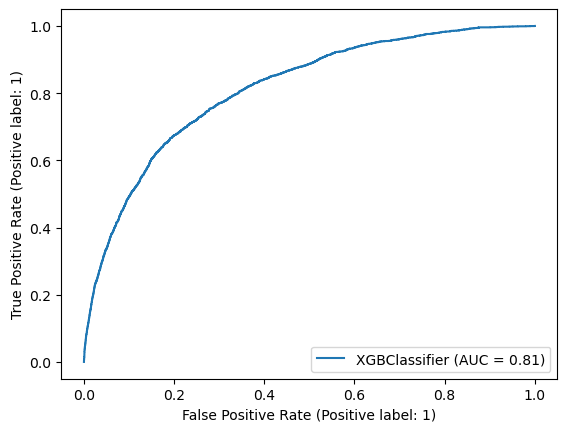

In [24]:
good_modelxgb= XGBClassifier(booster='gbtree', objective='binary:logistic', eta=0.1, max_depth=5, subsample=0.7,colsample_bytree=0.5, colsample_bylevel=0.9, colsample_bynode=0.8,
                             alpha=0.2, reg_lambda= 0.4, n_estimators=200, random_state=42, verbosity=1) # create model 
print(good_modelxgb) # display model parameters
good_modelxgb.fit(x_train_under,y_train_under.ravel()) # train model
predxgb = good_modelxgb.predict_proba(x_test)[:, 1]
threshold = 0.5
predxgb = (predxgb >= threshold).astype(int)# predicted output for test examples
print("Results on test data")
accsvm = accuracy_score(y_test, predxgb) # accuracy on test examples
precsvm = precision_score(y_test, predxgb) # precision on test examples
recasvm = recall_score(y_test, predxgb) # recall on test examples
print(f'Test accuracy = {accsvm: .4f}') # round to 4 decimal places
print(f'Test precision = {precsvm: .4f}') # round to 4 decimal places
print(f'Test recall = {recasvm: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, predxgb))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, predxgb)))
print('\nROC curve')
plot_roc_curve(good_modelxgb, x_test, y_test)  # 
plt.show()

# ADA BOOST

# OVER SAMPLING

AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=42)
Results on test data
Test accuracy =  0.9222
Test precision =  0.2154
Test recall =  0.0891
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     38399
           1       0.22      0.09      0.13      2582

    accuracy                           0.92     40981
   macro avg       0.58      0.53      0.54     40981
weighted avg       0.90      0.92      0.91     40981

Confusion matrix (Rows actual, Columns predicted):
       0    1
0  37561  838
1   2352  230

ROC curve


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


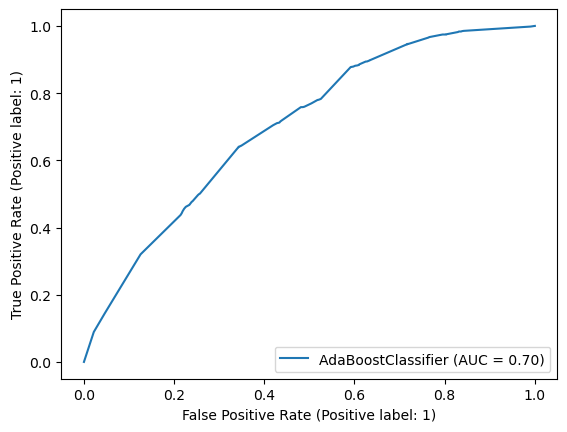

In [59]:
good_model_ada= AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 0.1, n_estimators= 20,random_state=42) # create model 
print(good_model_ada) # display model parameters
good_model_ada.fit(x_train_over,y_train_over.ravel())
pred_ada = good_model_ada.predict_proba(x_test)[:, 1]
threshold = 0.5
pred_ada = (pred_ada >= threshold).astype(int)
print("Results on test data")
accada= accuracy_score(y_test, pred_ada) # accuracy on test examples
precada = precision_score(y_test, pred_ada) # precision on test examples
recaada = recall_score(y_test, pred_ada) # recall on test examples
print(f'Test accuracy = {accada: .4f}') # round to 4 decimal places
print(f'Test precision = {precada: .4f}') # round to 4 decimal places
print(f'Test recall = {recaada: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_ada))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred_ada)))
print('\nROC curve')
plot_roc_curve(good_model_ada, x_test, y_test)  # 
plt.show()

# UNDER SAMPLING

AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=42)
Results on test data
Test accuracy =  0.9370
Test precision =  0.0000
Test recall =  0.0000
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38399
           1       0.00      0.00      0.00      2582

    accuracy                           0.94     40981
   macro avg       0.47      0.50      0.48     40981
weighted avg       0.88      0.94      0.91     40981

Confusion matrix (Rows actual, Columns predicted):
       0  1
0  38399  0
1   2582  0

ROC curve


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: Undefine

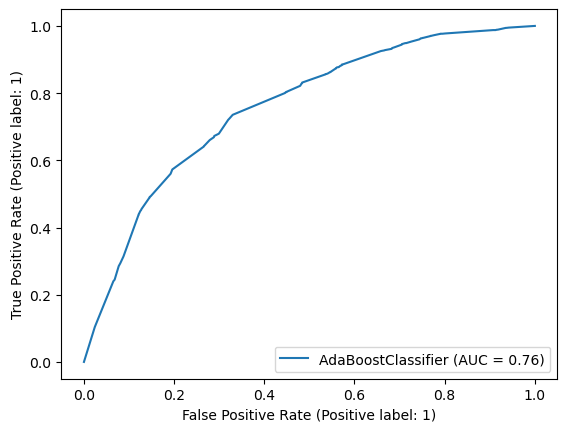

In [53]:
good_model_ada= AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 0.1, n_estimators= 20,random_state=42) # create model 
print(good_model_ada) # display model parameters
good_model_ada.fit(x_train_under,y_train_under.ravel())
pred_ada = good_model_ada.predict_proba(x_test)[:, 1]
threshold = 0.5
pred_ada = (pred_ada >= threshold).astype(int)
print("Results on test data")
accada= accuracy_score(y_test, pred_ada) # accuracy on test examples
precada = precision_score(y_test, pred_ada) # precision on test examples
recaada = recall_score(y_test, pred_ada) # recall on test examples
print(f'Test accuracy = {accada: .4f}') # round to 4 decimal places
print(f'Test precision = {precada: .4f}') # round to 4 decimal places
print(f'Test recall = {recaada: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_ada))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred_ada)))
print('\nROC curve')
plot_roc_curve(good_model_ada, x_test, y_test)  # 
plt.show()